<a href="https://colab.research.google.com/github/YakPort/mortgage-calc/blob/master/income_tax.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as pe
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [ ]:
'''https://www.pwc.com.au/taxtalk/tax-rates.html'''

def income_tax(x):
    '''https://www.ato.gov.au/rates/individual-income-tax-rates/'''
    if x <= 18200:
        return 0
    elif x <= 37000:
        return 0.19 * (x - 18200)
    elif x <= 90000:
        return 3572 + 0.325 * (x - 37000)
    elif x <= 180000:
        return 20797 + 0.37 * (x - 90000)
    else:
        return 54097 + 0.45 * (x - 180000)
    
def medicare_levy(x):
    '''
    https://www.ato.gov.au/Individuals/Medicare-levy/
    https://www.ato.gov.au/individuals/medicare-levy/medicare-levy-reduction-for-low-income-earners/ <-- Last year's figures
    '''
    if x <= 22398:
        return 0
    if x <= 27997:
        # (27997 * 0.02) / (27997 - 22398) = 0.1
        return 0.1 * (x - 22398)
    else:
        return 0.02 * x
    
def hecs_debt(x):
    '''https://www.ato.gov.au/Rates/HELP,-TSL-and-SFSS-repayment-thresholds-and-rates/'''
    thresholds = [
        (45880, 0),
        (52973, 0.01),
        (56151, 0.02),
        (59521, 0.025),
        (63092, 0.03),
        (66877, 0.035),
        (70890, 0.04),
        (75144, 0.045),
        (79652, 0.05),
        (84432, 0.055),
        (89498, 0.06),
        (94868, 0.065),
        (100560, 0.07),
        (106593, 0.075),
        (112989, 0.08),
        (119769, 0.085),
        (126955, 0.09),
        (134572, 0.095),
    ]
    
    for threshold, multiplier in thresholds:
        if x <= threshold:
            return x * multiplier
    # You rich
    return 0.1 * x

def mls(x):
    '''https://www.ato.gov.au/Individuals/Medicare-levy/Medicare-levy-surcharge/Income-thresholds-and-rates-for-the-Medicare-levy-surcharge/'''
    if x <= 90000:
        return 0
    elif x <= 105000:
        return 0.01 * x
    elif x <= 140000:
        return 0.0125 * x
    else:
        return 0.015 * x
    

def lmito(x):
    '''https://www.ato.gov.au/Individuals/Income-and-deductions/Offsets-and-rebates/Low-and-middle-income-earners/'''
    if x <= 37000:
        return -255
    elif x <= 48000:
        return -(255 + (x - 37000) * 0.075)
    elif x <= 90000:
        return -1080
    elif x <= 126000:
        return -1080 + (x - 90000) * 0.03
    else:
        return 0

In [ ]:
df = pd.DataFrame({
    'Income': [i for i in range(200000)]
})

In [ ]:
df['INCOME_TAX'] = df.Income.apply(income_tax)
df['MEDICARE_LEVY'] = df.Income.apply(medicare_levy)
df['HECS'] = df.Income.apply(hecs_debt)
df['MLS'] = df.Income.apply(mls)
df['LIMTO'] = df.Income.apply(lmito)

In [ ]:
df

,Income,INCOME_TAX,MEDICARE_LEVY,HECS,MLS,LIMTO
0,0,0.00,0.00,0.0,0.000,-255.0
1,1,0.00,0.00,0.0,0.000,-255.0
2,2,0.00,0.00,0.0,0.000,-255.0
3,3,0.00,0.00,0.0,0.000,-255.0
4,4,0.00,0.00,0.0,0.000,-255.0
...,...,...,...,...,...,...
199995,199995,63094.75,3999.90,19999.5,2999.925,0.0
199996,199996,63095.20,3999.92,19999.6,2999.940,0.0
199997,199997,63095.65,3999.94,19999.7,2999.955,0.0
199998,199998,63096.10,3999.96,19999.8,2999.970,0.0


In [ ]:
df['NORMAL'] = np.maximum(df.INCOME_TAX + df.MEDICARE_LEVY + df.LIMTO, 0)
df['MRGL_NORMAL'] = df.NORMAL.diff().fillna(0)

In [ ]:
df.MRGL_NORMAL

0         0.00
1         0.00
2         0.00
3         0.00
4         0.00
          ... 
199995    0.47
199996    0.47
199997    0.47
199998    0.47
199999    0.47
Name: MRGL_NORMAL, Length: 200000, dtype: float64

In [ ]:
df['W_HECS'] = np.maximum(df.INCOME_TAX + df.MEDICARE_LEVY + df.LIMTO + df.HECS, 0)
df['MRGL_W_HECS'] = df.W_HECS.diff().fillna(0)
df['MRGL_W_HECS_NRM'] = np.where(df.MRGL_W_HECS > 1.0, df.MRGL_W_HECS.shift(), df.MRGL_W_HECS)

In [ ]:
df.MRGL_W_HECS[df.MRGL_W_HECS > 1.0]

45881     459.080
52974     530.095
56152     281.125
59522     297.980
63093     315.840
66878     334.770
70891     354.840
75145     376.115
79653     398.660
84433     422.565
89499     447.900
94869     474.830
100561    503.295
106594    533.465
112990    565.450
119770    599.355
126956    635.260
134573    673.350
Name: MRGL_W_HECS, dtype: float64

In [ ]:
df['W_MLS'] = np.maximum(df.INCOME_TAX + df.MEDICARE_LEVY + df.LIMTO + df.MLS, 0)
df['MRGL_W_MLS'] = df.W_MLS.diff().fillna(0)
df['MRGL_W_MLS_NRM'] = np.where(df.MRGL_W_MLS > 1.0, df.MRGL_W_MLS.shift(), df.MRGL_W_MLS)

In [ ]:
df.MRGL_W_MLS

0         0.000
1         0.000
2         0.000
3         0.000
4         0.000
          ...  
199995    0.485
199996    0.485
199997    0.485
199998    0.485
199999    0.485
Name: MRGL_W_MLS, Length: 200000, dtype: float64

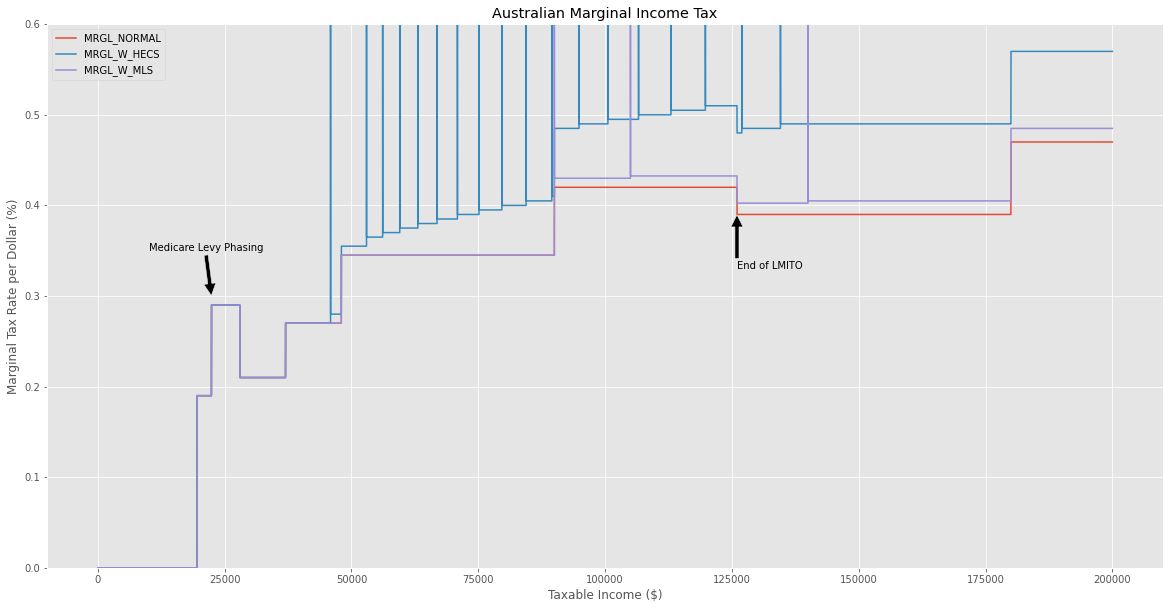

In [ ]:
ax = df.plot('Income', ['MRGL_NORMAL', 'MRGL_W_HECS', 'MRGL_W_MLS'], ylim=(0, 0.6), figsize=(20,10), title="Australian Marginal Income Tax")
ax.annotate('Medicare Levy Phasing', xy=(22398, 0.3), xytext=(10000, 0.35), arrowprops=dict(facecolor='black', shrink=0.01))
ax.annotate('End of LMITO', xy=(126000, 0.39), xytext=(126000, 0.33), arrowprops=dict(facecolor='black', shrink=0.01))
ax.set_xlabel("Taxable Income ($)")
ax.set_ylabel("Marginal Tax Rate per Dollar (%)")
plt.show()

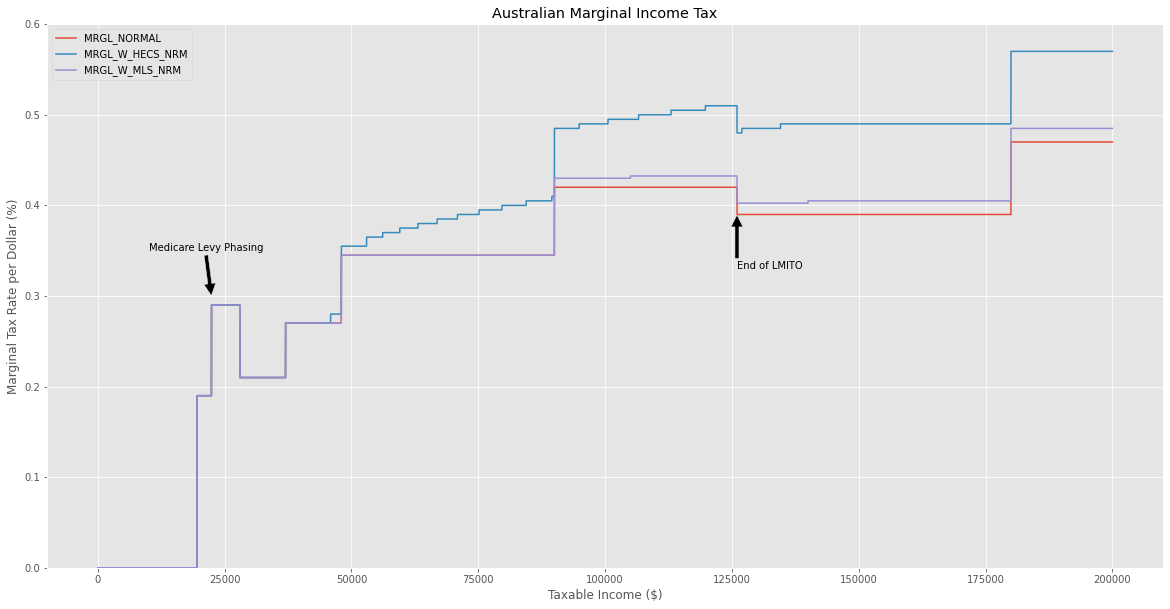

In [ ]:
ax = df.plot('Income', ['MRGL_NORMAL', 'MRGL_W_HECS_NRM', 'MRGL_W_MLS_NRM'], ylim=(0, 0.6), figsize=(20,10), title="Australian Marginal Income Tax")
ax.annotate('Medicare Levy Phasing', xy=(22398, 0.3), xytext=(10000, 0.35), arrowprops=dict(facecolor='black', shrink=0.01))
ax.annotate('End of LMITO', xy=(126000, 0.39), xytext=(126000, 0.33), arrowprops=dict(facecolor='black', shrink=0.01))
ax.set_xlabel("Taxable Income ($)")
ax.set_ylabel("Marginal Tax Rate per Dollar (%)")
plt.show()

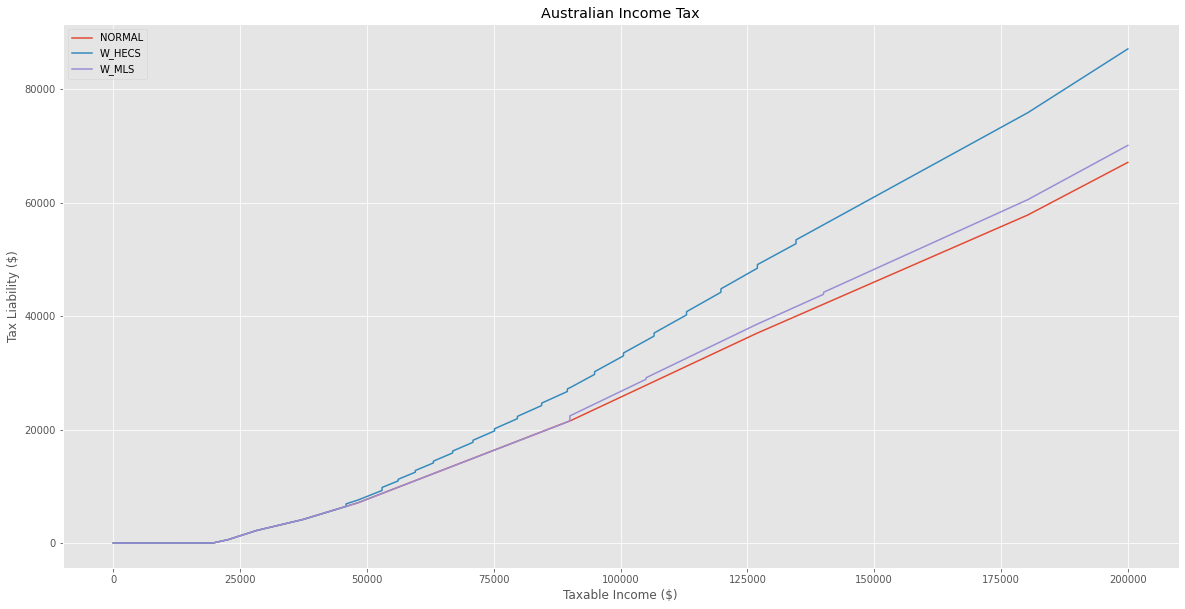

In [ ]:
ax = df.plot('Income', ['NORMAL', 'W_HECS', 'W_MLS'], figsize=(20,10), title="Australian Income Tax")
ax.set_xlabel("Taxable Income ($)")
ax.set_ylabel("Tax Liability ($)")
plt.show()